# Ejercicio 2
Aplicar SVD y PCA a un conjunto de datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataFile = 'server-metrics.xlsx'
df = pd.read_excel(dataFile, header=0)
df = df.replace('--',0)

print(df.head(5))

#Columnas a las que aplicaremos PCA (fea)
features = ['site-avgcpuporcentage','site-exceptions','site-serverexceptions','site-users','database-maxcpu','database-avgworkers','site-requests']
x = df.loc[:, features].values #separamos features
y = df.loc[:,['site-avgresponsetime']].values #seleccionamos target: tiempo promedio de respuesta de servidor

                 time  site-requests  site-avgresponsetime  \
0 2020-11-05 07:29:08          92406              0.359411   
1 2020-11-05 07:59:08         134706              0.360268   
2 2020-11-05 08:29:08         133212              0.366139   
3 2020-11-05 08:59:08         154517              0.299380   
4 2020-11-05 09:29:08         143685              0.361100   

   site-avgcpuporcentage  site-exceptions  site-serverexceptions  site-users  \
0                  32.86             3560                      0         896   
1                  44.40             4518                      0        1114   
2                  31.45             6722                     40        1098   
3                  30.95             6299                    120        1168   
4                  36.06             7892                      0        1252   

   database-maxcpu  database-avgworkers  
0               63             5.700000  
1               45             5.608333  
2               32  

## ¿Qué hace StandardScaler() en terminos de álgebra lineal?
Estándariza las *features* removiendo la media y escalando a la varianza unitaria. (Centering)

$z=(x-u)/s$ donde $z$ es el *z-score*, $x$ es la muestra, $u$ es la media de la muestra y $s$ la desviación estándard.

Se busca que la media de la distribución sea 0 y la desviación estándard 1.

*Fit_Transform(x)* acopla la información y la transforma.


In [5]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) 

Descomponemos los datos en componentes principales con el método *PCA()*.

In [6]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=7)
pca = PCA()
principalComponents = pca.fit_transform(x)
print(principalComponents[0])

[ 2.21110683 -0.41849337  1.02846987  0.36397691  0.29450751 -0.09160059
  0.14671448]


## ¿Cuál es el máximo de componentes principales que puedo pedir?
El número de features (columnas) que se tienen disponibles.

In [7]:
matrixComponents = pd.DataFrame(data = principalComponents, columns=['CP1','CP2','CP3','CP4','CP5','CP6','CP7'])
print(matrixComponents.head(10))

        CP1       CP2       CP3       CP4       CP5       CP6       CP7
0  2.211107 -0.418493  1.028470  0.363977  0.294508 -0.091601  0.146714
1  3.266939 -0.348456  0.217369  0.109232 -0.385462  0.155253  0.102782
2  2.948938 -0.053626 -0.218079 -0.437767  0.463122  0.063117 -0.075558
3  3.131067 -0.126647  0.123059 -0.777551  0.257418  0.265958 -0.046815
4  3.280395  0.009872 -0.162754 -0.597743 -0.038277 -0.055273 -0.084185
5  3.440316 -0.118675  0.494333 -0.967767  0.361172  0.043738 -0.024063
6  3.177510 -0.155609  0.081504 -0.849225  0.119877  0.139173  0.028232
7  4.181042 -0.139865 -0.230941 -0.542368  0.166723  0.041509  0.015340
8  3.759329 -0.069558  0.056624 -1.093844  0.128856 -0.082598  0.038287
9  3.563963 -0.253297  0.226233 -0.541036 -0.003891  0.086018  0.099279


## ¿Cómo se que tantas componentes es pertinente tomar en cuenta para mis datos?
Tomar en cuenta los componentes expliquen más la varianza de los datos. La suma de ratio de la varianza debe ser 1.

[3.7780031  1.94813142 0.99853476 0.20527756 0.07718707 0.00898792
 0.00477369]
[0.53810843 0.2774762  0.14222328 0.02923809 0.01099391 0.00128017
 0.00067993]


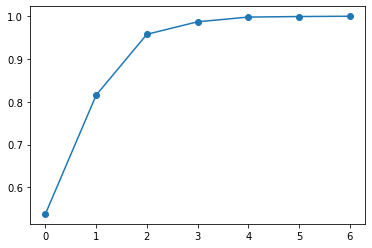

In [8]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

prc = pca.explained_variance_ratio_.reshape(7,1) 
prc_ac = np.cumsum(prc)
plt.plot(prc_ac, marker='o')


Viendo la gráfica anterior, se puede apreciar que los primeros tres componentes definen más del 90% de los datos.
